In [1]:
import json
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

#%qtconsole

# Exploratory Data Analysis 

In [2]:
with open('logins.json') as file:
    df_json = json.load(file)


In [3]:
df = pd.Series(df_json['login_time']).apply(pd.to_datetime).to_frame(name='logins').set_index('logins')
df['count'] = 1
df = df.resample('15Min').count()
df

,count
logins,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


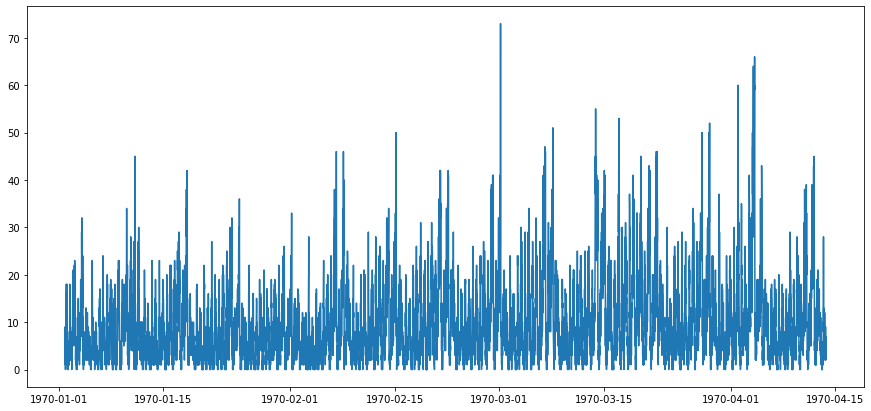

In [4]:
plt.figure(figsize=(15,7))
plt.plot(df)

Data does seem to be cyclical however cannot tell much with this data. Let's try to see if we can smooth out the noise.

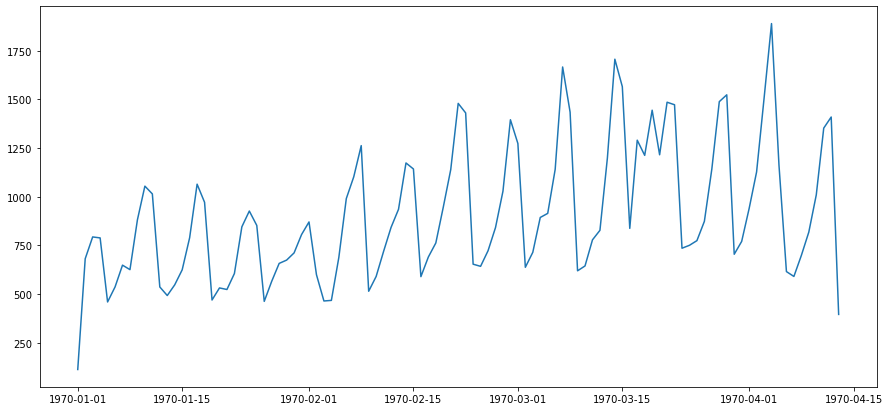

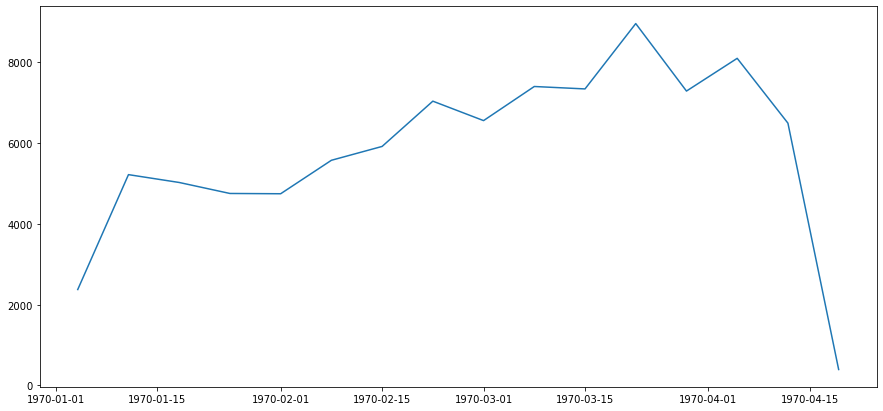

In [5]:
plt.figure(figsize=(15,7))
plt.plot(df.resample('D').sum())
plt.show()

plt.figure(figsize=(15,7))
plt.plot(df.resample('W').sum())
plt.show()

Seem to be able to find the overall trend weekly and logins increase over time (the last week is incomplete so shows a drop). Let's try to find the daily seasonality and figure out if there's a relationship with days of the week.

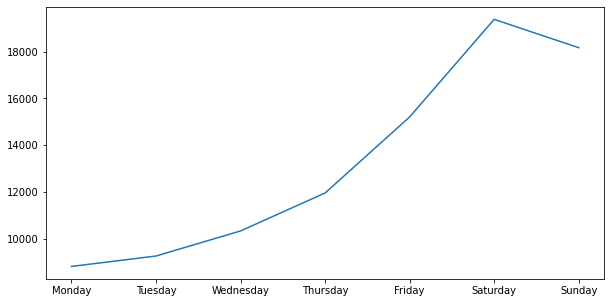

In [6]:
day_of_week = df.groupby(df.index.weekday)['count'].sum()
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(10,5))
plt.plot(day,day_of_week)

Looks like activity increases significantly coming up to the weekend and drops at the start of the weekend. How does it between days?

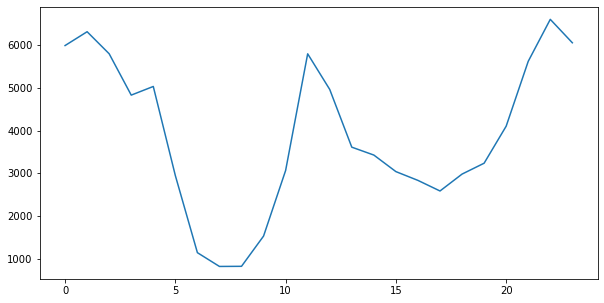

In [7]:
hour_of_day = df.groupby(df.index.hour)['count'].sum()

plt.figure(figsize=(10,5))
plt.plot(hour_of_day)

Activity seems to have three peaks - just after 00:00, around 12:00, and around 22:00

Data quality is fine in illustrating frequencies of logins for a certain period of time. One issue however, is that the dates are from 1970. I doubt that there were thousands of logins happening in 1970, so additional date information would help to ensure that our analysis on days of the week, as well as specific time is correct.

# Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

Since the drivers tend to be exclusive to each city, a good measurement (with tools listed available in the statement) of success would be an increase in number of toll-reimbursements claimed by drivers. We could then figure out which cities have been more successful in availability in both cities by splitting the reimbursements between the city operations managers.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

An example experiment to test this would be to randomly sample the drivers and set up a hypothesis test to see if the drivers have had an increase in trips across the toll bridge. Randomly select only a specific amount of partners to reimburse the toll roads, and randomly select a similar sized group of partners that do not get reimbursements for the toll road. For the non-reimbursed partrners, GPS location information should be available and a trigger could be set if a partner passes the toll-road boundary. Then we would be able to compare how many times partners cross the toll-road boundary with or without reimbursements.

b. what statistical test(s) you will conduct to verify the significance of the observation

The null test in this hypothesis test would be to assume that there is no significant difference between the reimbursed, and non-reimbursed drivers in terms of toll-road crossings. As two numerical results are being compared between categorical variables, a t-test would be the most appropriate test to solve this hypothesis test.

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

If the null hypothesis is rejected (significantly different), then we can assume that the reimbursement program did succeed in increasing intra-city traffic.

Though one test could prove the hypothesis, multiple tests would be able to increase the confidence in the result of one experiment. One of the important things here is to make sure that the samples are representative of the driving population including driver demographics, and timing of trips.

If the null hypothesis is confirmed (not significantly different), then the program would not have increased intra-city traffic. At this point, if the objective is still on the managers to increase intra-city traffic the root causes of this would need to be assessed; why aren't the drivers making it out to the other city? Are costs too high? Are drive times too long? Do Gotham people not like Metropolis people?

# Predictive Modelling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [8]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Missing Values 

Missing values in three columns, however most are very small amounts and shouldn't be an issue moving forward. Let's see what these values are like before imputing them.

<Figure size 720x360 with 0 Axes>

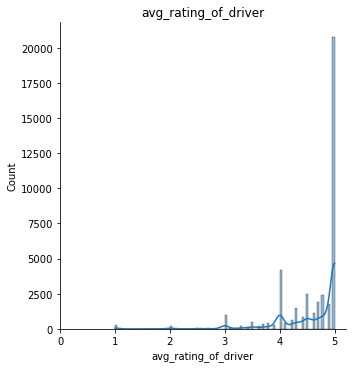

In [10]:
missing_col = 'avg_rating_of_driver'

plt.figure(figsize=(10,5))
sns.displot(data=df[missing_col],kde=True)
plt.xlim(0)
plt.title(missing_col)
plt.show()

Data is not normal so will be imputed by median.

<Figure size 720x360 with 0 Axes>

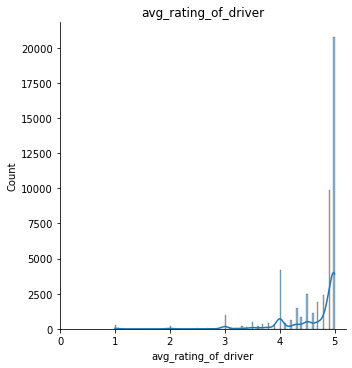

In [11]:
df[missing_col].fillna(df[missing_col].median(),inplace=True)

plt.figure(figsize=(10,5))
sns.displot(data=df[missing_col],kde=True)
plt.xlim(0)
plt.title(missing_col)
plt.show()

In [12]:
missing_col = 'phone'

prob = df[missing_col].value_counts(normalize=True)
prob

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

Binary decision. Impute based on probability.

In [13]:
for idx in df[missing_col].isna().index.tolist():
    df.loc[idx,missing_col] = np.random.choice([prob.index[0],prob.index[1]],p=[prob.values[0],prob.values[1]])
    
df[missing_col].value_counts(normalize=True)

iPhone     0.69692
Android    0.30308
Name: phone, dtype: float64

<Figure size 720x360 with 0 Axes>

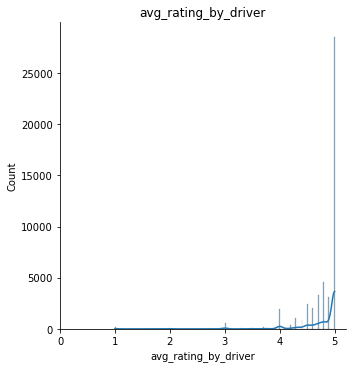

In [14]:
missing_col = 'avg_rating_by_driver'

plt.figure(figsize=(10,5))
sns.displot(data=df[missing_col],kde=True)
plt.xlim(0)
plt.title(missing_col)
plt.show()

Same non-normal distribution will impute by median.

<Figure size 720x360 with 0 Axes>

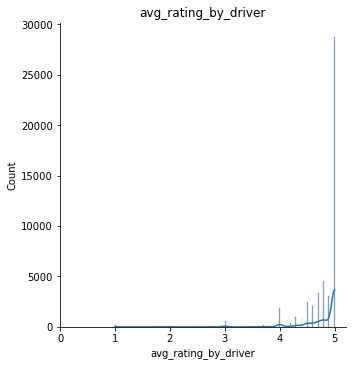

In [15]:
df[missing_col].fillna(df[missing_col].median(),inplace=True)

plt.figure(figsize=(10,5))
sns.displot(data=df[missing_col],kde=True)
plt.xlim(0)
plt.title(missing_col)
plt.show()

### Convert data types and create variables for tracking retention

In [16]:
df[['last_trip_date','signup_date']] = df[['last_trip_date','signup_date']].apply(pd.to_datetime)

In [17]:
# Latest trip taken would be equivalent to date of data pull to calculation retention.

data_pull_date = df['last_trip_date'].max()
retention_date = data_pull_date - dt.timedelta(days=30)

def retention_check(df):
    if df['last_trip_date'] >= retention_date:
        df['active'] = True
    else:
        df['active'] = False
        
    return df
        
df = df.apply(retention_check,axis=1)

df['active'].value_counts(normalize=True)

False    0.62392
True     0.37608
Name: active, dtype: float64

### Feature preparation and EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  bool  

#### City

In [19]:
var = 'city'

df[var].value_counts(normalize=True)

Winterfell        0.46672
Astapor           0.33068
King's Landing    0.20260
Name: city, dtype: float64

In [20]:
df = pd.concat([df,pd.get_dummies(df[var],prefix=var)],axis=1)
df = df.drop(labels=[var],axis=1)

#### Phone

In [21]:
var = 'phone'

df[var].value_counts(normalize=True)

iPhone     0.69692
Android    0.30308
Name: phone, dtype: float64

In [22]:
df = pd.concat([df,pd.get_dummies(df[var],prefix=var)],axis=1)
df = df.drop(labels=[var],axis=1)

#### ultimate_black_user

In [23]:
var = 'ultimate_black_user'

df[var].value_counts(normalize=True)

False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

In [24]:
df = pd.concat([df,pd.get_dummies(df[var],prefix=var)],axis=1)
df = df.drop(labels=[var],axis=1)

<AxesSubplot:>

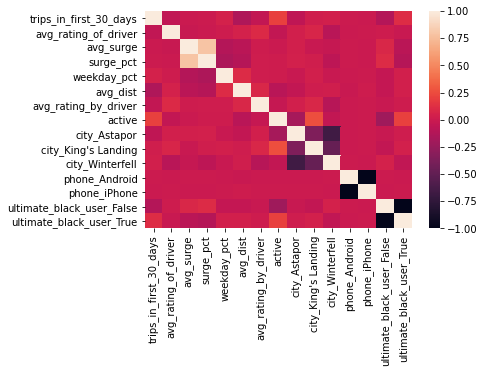

In [25]:
sns.heatmap(df.corr(method='pearson'))

From the correlation heatmap, it looks as though there are three features that positively influence the probability of an active user : 
* ultimate black user
* sign up location of King's Landing
* high amount of trips in the first 30 days.

# Predictive Model

In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, 
    confusion_matrix, plot_confusion_matrix, make_scorer,multilabel_confusion_matrix,ConfusionMatrixDisplay, 
    classification_report)

scoring_df = pd.DataFrame(index=['Dummy','SVC','RFC','XGB'],columns=['accuracy','precision','recall','F1','AUC'])

def scoring_func(model,y_test,y_pred):
    scoring_df.loc[model,'accuracy'] = accuracy_score(y_test,y_pred)
    scoring_df.loc[model,'precision'] = precision_score(y_test,y_pred)
    scoring_df.loc[model,'recall'] = recall_score(y_test,y_pred)
    scoring_df.loc[model,'F1'] = f1_score(y_test,y_pred)
    scoring_df.loc[model,'AUC'] = roc_auc_score(y_test,y_pred)

    return scoring_df.loc[model,:]
    

In [27]:
X = df.drop(['active','last_trip_date','signup_date'],axis=1)
y = df.active.values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=42)

In [28]:
df.active.value_counts(normalize=True)

False    0.62392
True     0.37608
Name: active, dtype: float64

## Dummy / Baseline Model 

C:\Users\bryan\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


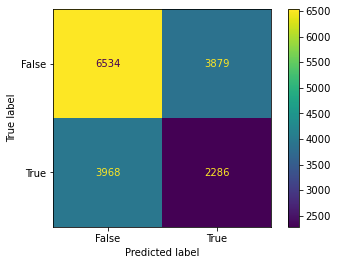

In [29]:
model = DummyClassifier()
scaler = StandardScaler()
feat_sel = SelectKBest()

grid_params = {
    'scaler' : [MinMaxScaler()], #[StandardScaler(),MinMaxScaler()],
    'feat_sel__k': [7], #np.arange(1,X.shape[1]+1,step=1)
}

Dummy_base = GridSearchCV(Pipeline([('scaler',scaler),('feat_sel',feat_sel),('model',model)]),cv=5,param_grid=grid_params,n_jobs=-1)

Dummy_base.fit(X_train,y_train)

y_pred = Dummy_base.predict(X_test)

scoring_func('Dummy',y_test,y_pred)

plot_confusion_matrix(Dummy_base,X_test,y_test)

In [30]:
scoring_df.sort_values('accuracy', ascending=False)

,accuracy,precision,recall,F1,AUC
Dummy,0.533509,0.380066,0.385353,0.382692,0.503922
SVC,NaN,NaN,NaN,NaN,NaN
RFC,NaN,NaN,NaN,NaN,NaN
XGB,NaN,NaN,NaN,NaN,NaN


## Support Vector Machine

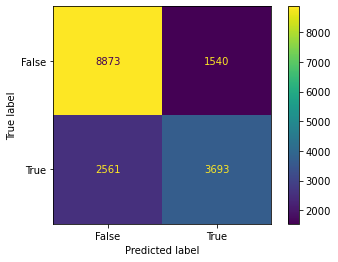

In [36]:
model = SVC()
scaler = StandardScaler()
feat_sel = SelectKBest()

grid_params = {
    'scaler' : [StandardScaler()], #[StandardScaler(),MinMaxScaler()],
    'feat_sel__k': [13], #np.arange(1,X.shape[1]+1,step=1),
    'model__C' : [5], #[0.1,1,5,10],
    'model__gamma' : [0.1], #[0.01,0.1,0.5,1]
}

SVC_base = GridSearchCV(Pipeline([('scaler',scaler),('feat_sel',feat_sel),('model',model)]),cv=5,param_grid=grid_params,n_jobs=-1)

SVC_base.fit(X_train,y_train)

y_pred = SVC_base.predict(X_test)

scoring_func('SVC',y_test,y_pred)

plot_confusion_matrix(SVC_base,X_test,y_test)

In [38]:
scoring_df.sort_values('accuracy', ascending=False)

,accuracy,precision,recall,F1,AUC
Dummy,0.533509,0.380066,0.385353,0.382692,0.503922
SVC,0.753945,0.705714,0.590502,0.642988,0.721305
RFC,NaN,NaN,NaN,NaN,NaN
XGB,NaN,NaN,NaN,NaN,NaN


## Random Forest Classifier

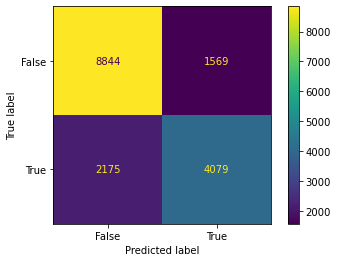

In [51]:
model = RandomForestClassifier(random_state=42)
scaler = StandardScaler()
feat_sel = SelectKBest()

grid_params = {
    'scaler' : [StandardScaler()], #[StandardScaler(),MinMaxScaler()],
    'feat_sel__k': [13], #np.arange(1,X.shape[1]+1,step=1),
    'model__n_estimators' : [150], #[10,50,100,150,200,300],
    'model__criterion': ['gini'], #['gini','entropy'],
    'model__max_depth': [13], #[None,1,3,5,7,9,11,13,15],
    'model__min_samples_leaf': [6], #np.arange(1,10),
    'model__max_features' : [4], #np.arange(1,10),
}

RFC_base = GridSearchCV(Pipeline([('scaler',scaler),('feat_sel',feat_sel),('model',model)]),cv=5,param_grid=grid_params,n_jobs=-1)

RFC_base.fit(X_train,y_train)

y_pred = RFC_base.predict(X_test)

scoring_func('RFC',y_test,y_pred)

plot_confusion_matrix(RFC_base,X_test,y_test)

In [54]:
scoring_df.sort_values('accuracy', ascending=False)

,accuracy,precision,recall,F1,AUC
RFC,0.775364,0.722203,0.652223,0.685431,0.750773
SVC,0.753945,0.705714,0.590502,0.642988,0.721305
Dummy,0.533509,0.380066,0.385353,0.382692,0.503922
XGB,NaN,NaN,NaN,NaN,NaN


# Model review : 

Looks like RFC performs best in all metrics at near 78% for accuracy. Let's see how which features are most important to the 

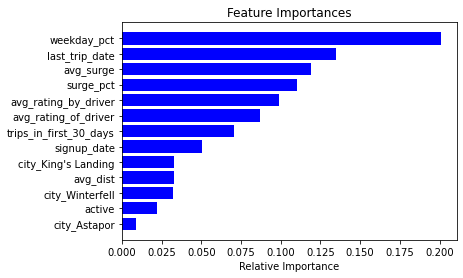

In [106]:
features = df.columns.tolist()
importances = RFC_base.best_estimator_.named_steps.model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Looks like weekday_pct is the most important factor for active users. Let's see how it relates to active users.

<AxesSubplot:xlabel='weekday_pct', ylabel='Density'>

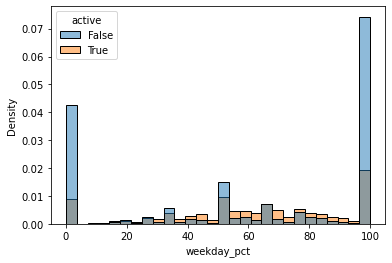

In [108]:
sns.histplot(data=df, x='weekday_pct',hue='active',stat='density')

Looks like inactive users show a larger tendency to either only do it on the weekday, or never do it on the weekday.

<AxesSubplot:xlabel='avg_surge', ylabel='Density'>

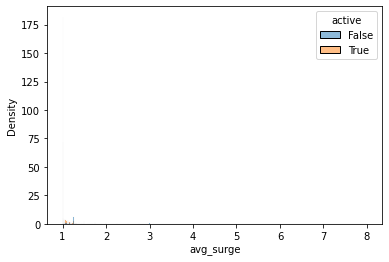

In [110]:
sns.histplot(data=df, x='avg_surge',hue='active',stat='density')